# **TP 06 BY NFIDSA HALIMA**

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [28]:
def display_image(title, image, cmap='gray'):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()


# cameraman.tif  ==> IT'S SUPPOSED TO BE THE IMAGE BUT I DIDN'T FIND IT IN THE RESOURCES OF TP06
cameraman_image = cv2.imread('/content/Fig3.tif', cv2.IMREAD_GRAYSCALE)
periodic_noise_image = cv2.imread('/content/image_bruitee_Periodique.jpg', cv2.IMREAD_GRAYSCALE)

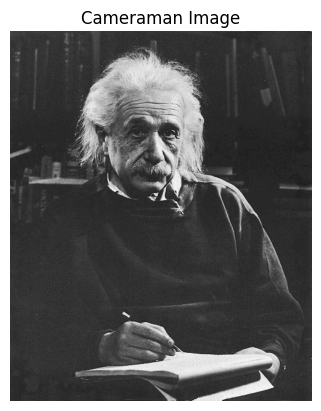

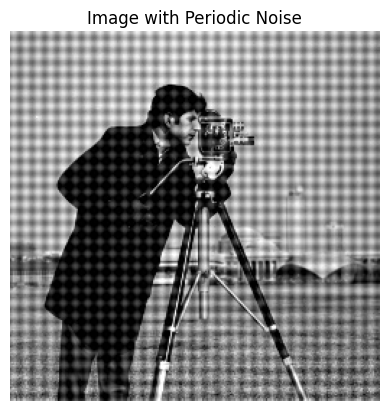

Cameraman Image Shape: (600, 490)
Periodic Noise Image Shape: (256, 256)


In [29]:
display_image("Cameraman Image", cameraman_image)
display_image("Image with Periodic Noise", periodic_noise_image)

print(f"Cameraman Image Shape: {cameraman_image.shape}")
print(f"Periodic Noise Image Shape: {periodic_noise_image.shape}")

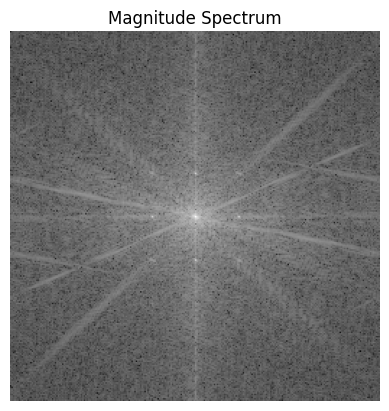

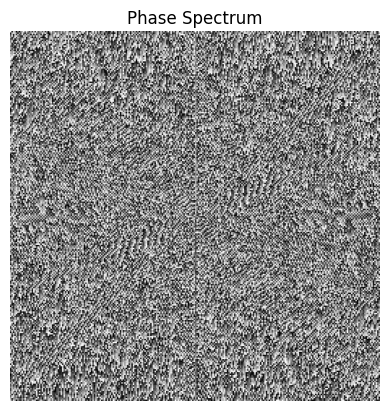

In [30]:
def compute_fourier_transform(image):
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)
    magnitude_spectrum = np.log(1 + np.abs(Fshift))
    phase_spectrum = np.angle(Fshift)
    return Fshift, magnitude_spectrum, phase_spectrum

Fshift, magnitude_spectrum, phase_spectrum = compute_fourier_transform(periodic_noise_image)

display_image("Magnitude Spectrum", magnitude_spectrum)
display_image("Phase Spectrum", phase_spectrum)

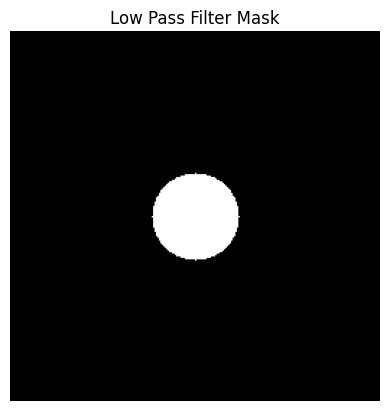

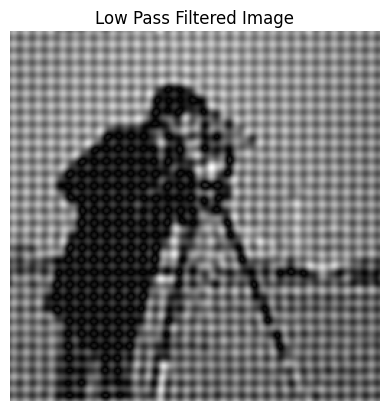

In [31]:
def apply_low_pass_filter(image, radius):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)
    return mask

low_pass_mask = apply_low_pass_filter(periodic_noise_image, radius=30)
filtered_image_low_pass = np.fft.ifft2(np.fft.ifftshift(Fshift * low_pass_mask))
filtered_image_low_pass = np.abs(filtered_image_low_pass)

display_image("Low Pass Filter Mask", low_pass_mask)
display_image("Low Pass Filtered Image", filtered_image_low_pass)

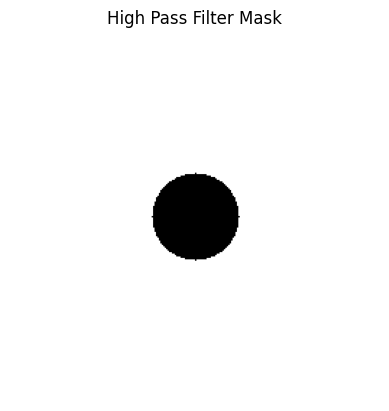

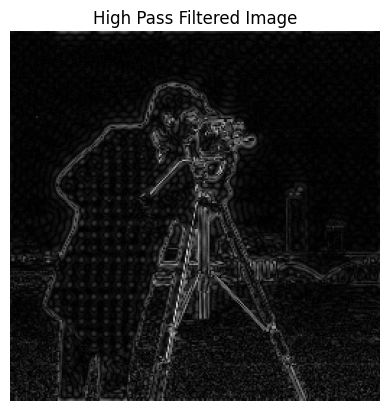

In [32]:
def apply_high_pass_filter(image, radius):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)
    return mask

high_pass_mask = apply_high_pass_filter(periodic_noise_image, radius=30)
filtered_image_high_pass = np.fft.ifft2(np.fft.ifftshift(Fshift * high_pass_mask))
filtered_image_high_pass = np.abs(filtered_image_high_pass)

display_image("High Pass Filter Mask", high_pass_mask)
display_image("High Pass Filtered Image", filtered_image_high_pass)

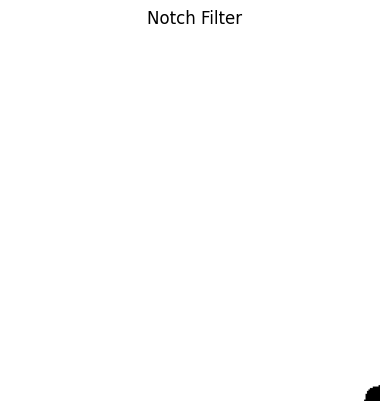

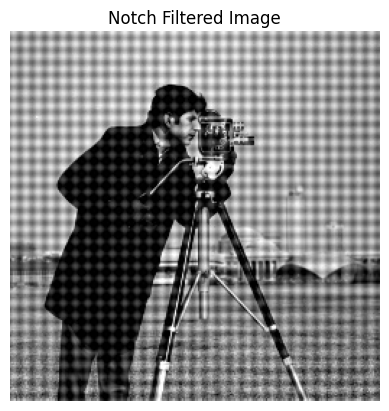

In [33]:
def create_notch_filter(image, notch_centers, radius=10):
    rows, cols = image.shape
    mask = np.ones((rows, cols), np.uint8)
    for center in notch_centers:
        cv2.circle(mask, center, radius, 0, thickness=-1)
    return mask

notch_centers = [(255, 255), (300, 300)]
notch_filter = create_notch_filter(periodic_noise_image, notch_centers)
filtered_image_notch = np.fft.ifft2(np.fft.ifftshift(Fshift * notch_filter))
filtered_image_notch = np.abs(filtered_image_notch)

display_image("Notch Filter", notch_filter)
display_image("Notch Filtered Image", filtered_image_notch)

In [34]:
def apply_gaussian_filter(image, radius, low_pass=True):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.meshgrid(np.linspace(-ccol, ccol, cols), np.linspace(-crow, crow, rows))
    d = np.sqrt(x**2 + y**2)
    gaussian_mask = np.exp(-d**2 / (2 * radius**2))
    return gaussian_mask if low_pass else 1 - gaussian_mask

gaussian_low_pass = apply_gaussian_filter(periodic_noise_image, radius=30)
gaussian_high_pass = apply_gaussian_filter(periodic_noise_image, radius=30, low_pass=False)

filtered_image_gaussian_low = np.fft.ifft2(np.fft.ifftshift(Fshift * gaussian_low_pass))
filtered_image_gaussian_low = np.abs(filtered_image_gaussian_low)

filtered_image_gaussian_high = np.fft.ifft2(np.fft.ifftshift(Fshift * gaussian_high_pass))
filtered_image_gaussian_high = np.abs(filtered_image_gaussian_high)

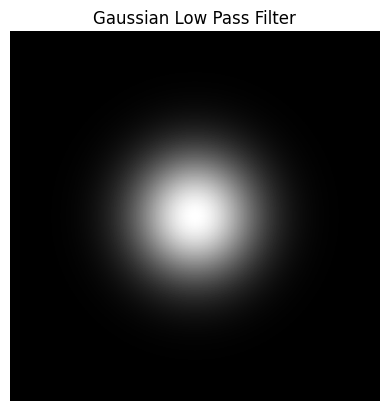

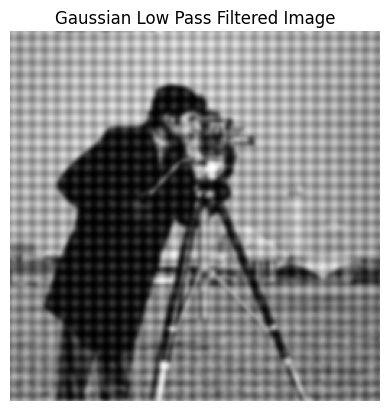

In [35]:
display_image("Gaussian Low Pass Filter", gaussian_low_pass)
display_image("Gaussian Low Pass Filtered Image", filtered_image_gaussian_low)

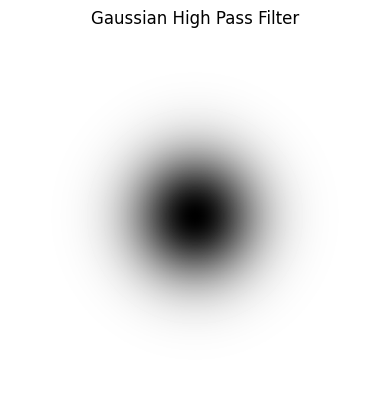

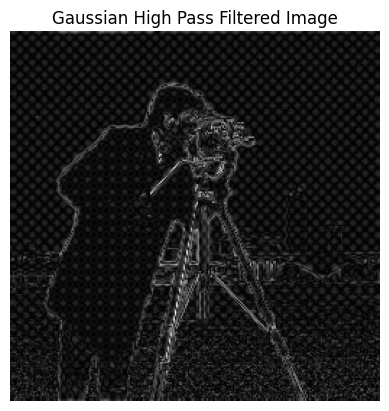

In [36]:
display_image("Gaussian High Pass Filter", gaussian_high_pass)
display_image("Gaussian High Pass Filtered Image", filtered_image_gaussian_high)